In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '/Users/at/Desktop/Codes/creditcarddata/creditcard.csv'
df = pd.read_csv(path)

In [4]:
df.shape
df.info()
df.head()
df.describe()
fnf=df["Class"].value_counts()
print(fnf)
print(fnf/len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'No of observations')

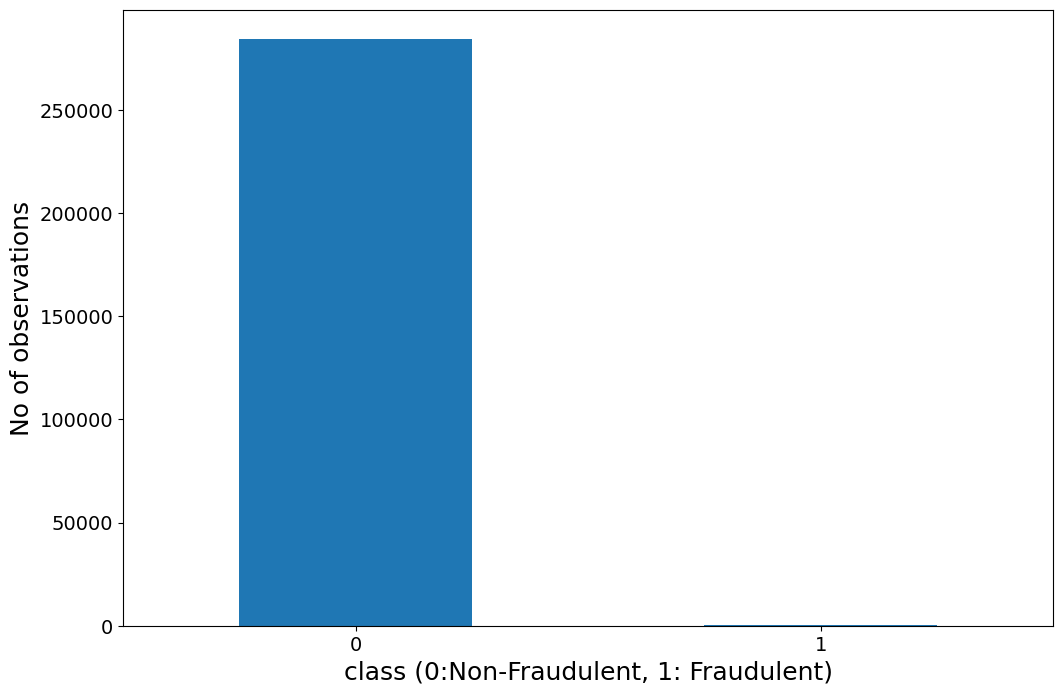

In [5]:
#Data visualization
import seaborn as sns
f,ax=plt.subplots(figsize=(12,8))
fnf.plot(kind="bar",rot=0, fontsize=14)
ax.set_xlabel('class (0:Non-Fraudulent, 1: Fraudulent)',fontsize=18)
ax.set_ylabel('No of observations',fontsize=18)

/Users/at/Desktop/Codes/Credit Card Fraud Detection/credit-card-fraud-detection/.venv/lib/python3.12/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/var/folders/hd/ydj5vdmj50s4nfb098cbhj8h0000gn/T/ipykernel_25855/1394468938.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticks(), size = 15)
/var/folders/hd/ydj5vdmj50s4nfb098cbhj8h0000gn/T/ipykernel_25855/1394468938.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticks(), size = 15)
/Users/at/Desktop/Codes/Credit Card Fraud Detection/credit-card-fraud-detection/.venv/lib/python3.12/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is

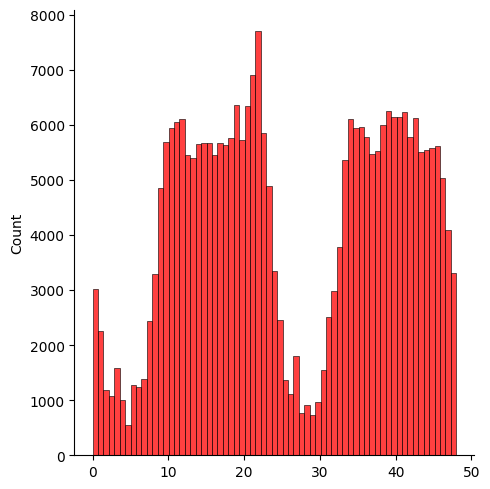

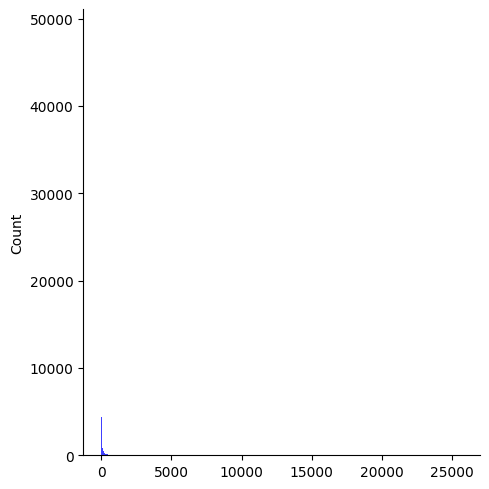

In [25]:
#Seaborn polot
sns.displot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time',fontsize=24)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])
ax[0].set_xticklabels(ax[0].get_xticks(), size = 15)
ax[0].set_yticklabels(ax[0].get_yticks(), size = 15)

sns.displot(df['Amount'].values, ax=ax[1], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=24)
ax[0].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])
ax[0].set_xticklabels(ax[1].get_xticks(), size = 15)
ax[0].set_yticklabels(ax[1].get_yticks(), size = 15)
plt.show()


In [26]:
#Separate the dataset to Fraud and non-fraud
df_nonfraud=df[df.Class==0]
df_fraud=df[df.Class==1]
print(df_nonfraud)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [27]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('-'*30)
print(df_fraud.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
------------------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [28]:
# Import the module
from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

F: 9.033344712018891
p: 0.0026512206498182328


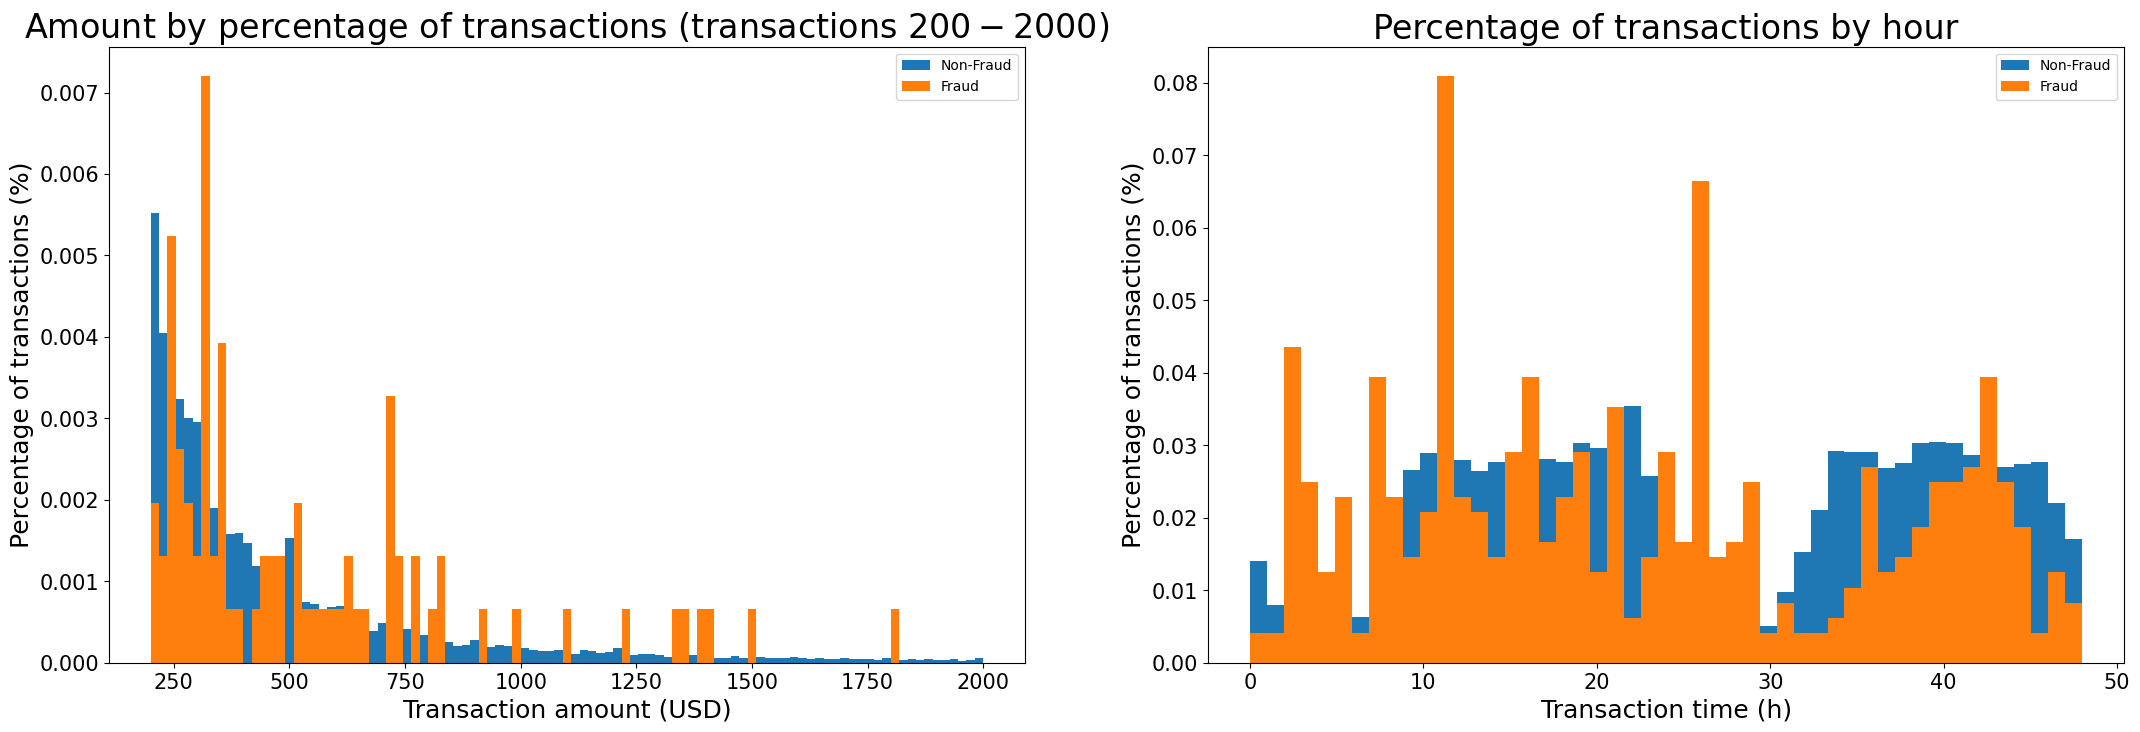

In [29]:
# Plot of high value transactions(2000)
plt.figure(figsize=(26,8))
plt.subplot(1, 2, 1)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions $200-$2000)",fontsize=24)
plt.xlabel("Transaction amount (USD)",fontsize=18)
plt.ylabel("Percentage of transactions (%)",fontsize=18)
plt.xticks( size = 15)
plt.yticks( size = 15)

plt.subplot(1, 2, 2)
# Plot of high Trasaction time during the day
bins = np.linspace(0, 48)
plt.hist(df_nonfraud.Time/(60*60), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Time/(60*60), bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour",fontsize=24)
plt.xlabel("Transaction time (h)",fontsize=18)
plt.ylabel("Percentage of transactions (%)",fontsize=18)
plt.xticks( size = 15)
plt.yticks( size = 15)

plt.show()

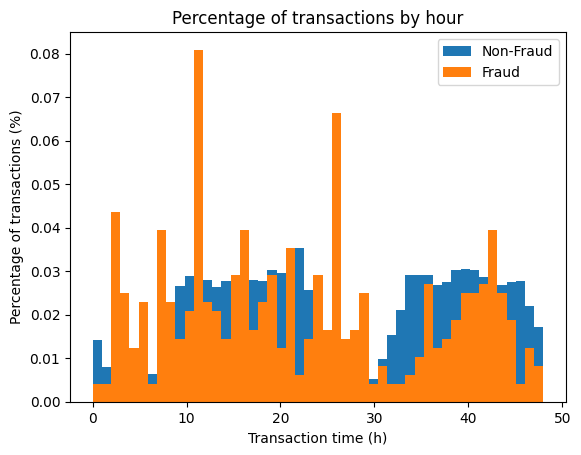

In [30]:
# Plot of high Trasaction time during the day
bins = np.linspace(0, 48)
plt.hist(df_nonfraud.Time/(60*60), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Time/(60*60), bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time (h)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

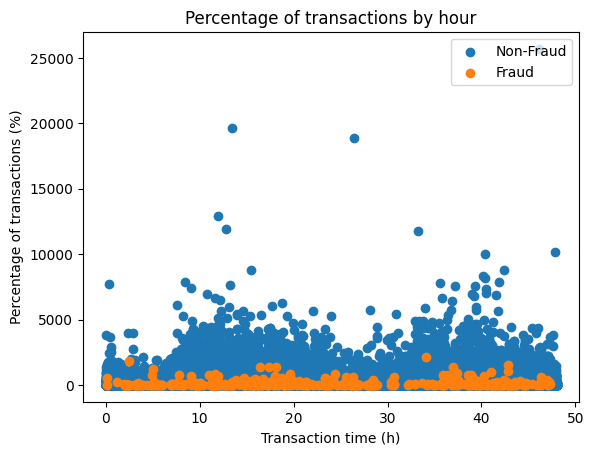

In [31]:
plt.scatter(df_nonfraud.Time/(60*60),df_nonfraud.Amount,label="Non-Fraud")
plt.scatter(df_fraud.Time/(60*60),df_fraud.Amount,label="Fraud")
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time (h)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

In [ ]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler

In [32]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()
#print(df_scaled.shape)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


<Axes: >

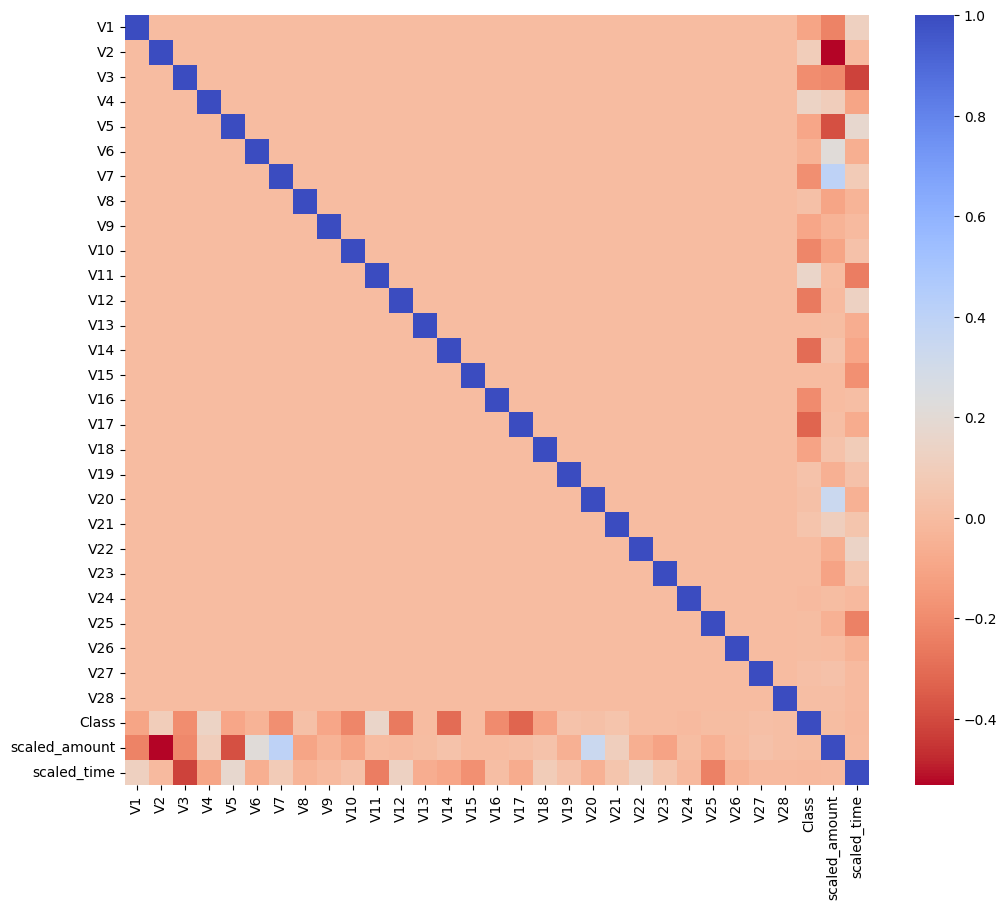

In [33]:
# Calculate pearson correlation coefficience
corr = df_scaled.corr() 
f, ax = plt.subplots(1, 1, figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [34]:
X = df_scaled.drop(['Class'],axis=1, inplace=False)
X =  np.array(X, dtype="float32")
y=df_scaled[['Class']]
y=np.array(y, dtype="uint8")
print(X)
print(y)
print(X.shape)
print(y.shape)


[[-1.3598071  -0.07278118  2.5363467  ... -0.02105305  1.7832739
  -0.9949835 ]
 [ 1.1918571   0.2661507   0.16648011 ...  0.01472417 -0.26982462
  -0.9949835 ]
 [-1.3583541  -1.3401631   1.7732093  ... -0.05975184  4.9837213
  -0.99497175]
 ...
 [ 1.919565   -0.30125386 -3.2496397  ... -0.02656083  0.6410955
   1.0349746 ]
 [-0.24044006  0.53048253  0.70251024 ...  0.10453282 -0.16767973
   1.0349746 ]
 [-0.5334125  -0.18973334  0.7033374  ...  0.01364891  2.7247956
   1.0350215 ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
(284807, 30)
(284807, 1)
